# Projekt Papier-Kamień-Nożyce

## Program, uczący się gry “papier, kamień, nożyce”. Jako algorytm uczący zastosowany został łańcuch Markowa z macierzą przejść pomiędzy trzema stanami (Papier, Kamień, Nożyce). Nauka gry polega na korekcie macierzy przejść (prawdopodobieństwa warunkowe zmiany stanu).

## Zasady gry
- ### Papier > Kamień > Nożyce
- ### Wartość "wypłaty" punktowej dla gracza:
    - #### 1 w przypadku wygranej,
    - #### −1 w przypadku przegranej
    - #### 0 w przypadku remisu.
- ### Sterowanie:
    - #### P - papier (ang. paper)
    - #### R - kamień (ang. rock)
    - #### S - nożyce (ang. scissors)
    - #### exit - zakończenie gry

## Przykładowy przegieg stanu rozgrywki przy przeprowadzeniu ciągu kilkudziesięciu gier

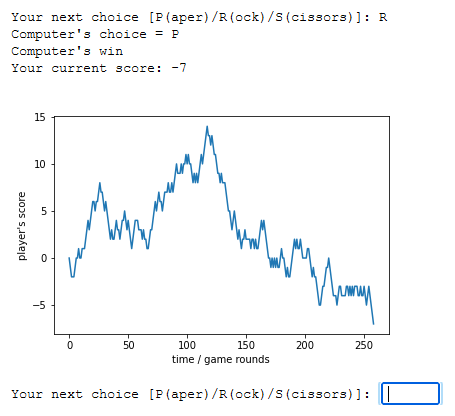

# Paper-Rock-Scissors - Computer vs Human

In [ ]:
import numpy
import matplotlib.pyplot as plt

options = ['P', 'R', 'S']
playerChoices = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
probability = [1, 1, 1]
lastPlayerChoice = numpy.random.choice(options, p = [1/3, 1/3, 1/3])
playerChoice = ''

scoreHistory = []
score = 0
scoreHistory.append(score)
print('Your initial score: ' + str(score))

# game loop
while(playerChoice != 'exit'):
    #for prob in playerChoices:
        #print(prob)
    
    choiceRow = options.index(lastPlayerChoice)
    sumOfGivenChoices = sum(playerChoices[choiceRow])
    
    for x in range(len(probability)):
        probability[x] = playerChoices[choiceRow][x] / sumOfGivenChoices

    #print(probability)

    playerPredictedChoice = numpy.random.choice(options, p = probability)
    #print('playerPredictedChoice = ' + playerPredictedChoice)

    computerChoice = ''

    if playerPredictedChoice == 'S':
        computerChoice = 'R'
    elif playerPredictedChoice == 'R':
        computerChoice = 'P'
    else:
        computerChoice = 'S'

    playerChoice = ''
    while(playerChoice != options[0] and playerChoice != options[1] and playerChoice != options[2] and playerChoice != 'exit'):
        playerChoice = input('Your next choice [P(aper)/R(ock)/S(cissors)]: ')
    
    if playerChoice == 'exit':
        print('Your final score: ' + str(score))
        print('Thanks for playing :)')
    else:
        playerChoices[options.index(lastPlayerChoice)][options.index(playerChoice)] += 1
        lastPlayerChoice = playerChoice
        
        print('Computer\'s choice = ' + computerChoice)

        if playerChoice == computerChoice:
            print('Draw!')
        else:
            if  playerChoice == 'S' and computerChoice == 'R' or \
                playerChoice == 'R' and computerChoice == 'P' or \
                playerChoice == 'P' and computerChoice == 'S':
                    print('Computer\'s win')
                    score -= 1
            else:
                print('Player\'s win')
                score += 1

        print('Your current score: ' + str(score))
        print()
        
        scoreHistory.append(score)
        plt.plot(scoreHistory)
        plt.xlabel('time / game rounds')
        plt.ylabel('player\'s score')
        plt.show()